# Исследование объявлений о продаже квартир

**Цель исследования** - провести исследовательский анализ данных и определить рыночную стоимость объектов недвижимости.

**Задачи исследования:**

1. Проанализировать данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

2. Установить параметры, влияющие на цену объектов - это позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.

Для анализа будут использованы данные сервиса Яндекс Недвижимость. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## 1. Обзор данных

#### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из общей информации о датасете можно сделать следующие выводы:
1. В данных присутствуют пропуски, которые будем обрабатывать на этапе предобработки.
2. Обнаружены некорректные названия столбцов, которые необходимо привести к единому стилю на этапе предобработки.
3. Необходимо будет изменить тип данных в некторых столбцах. Подробнее изучим на этапе предобработки.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


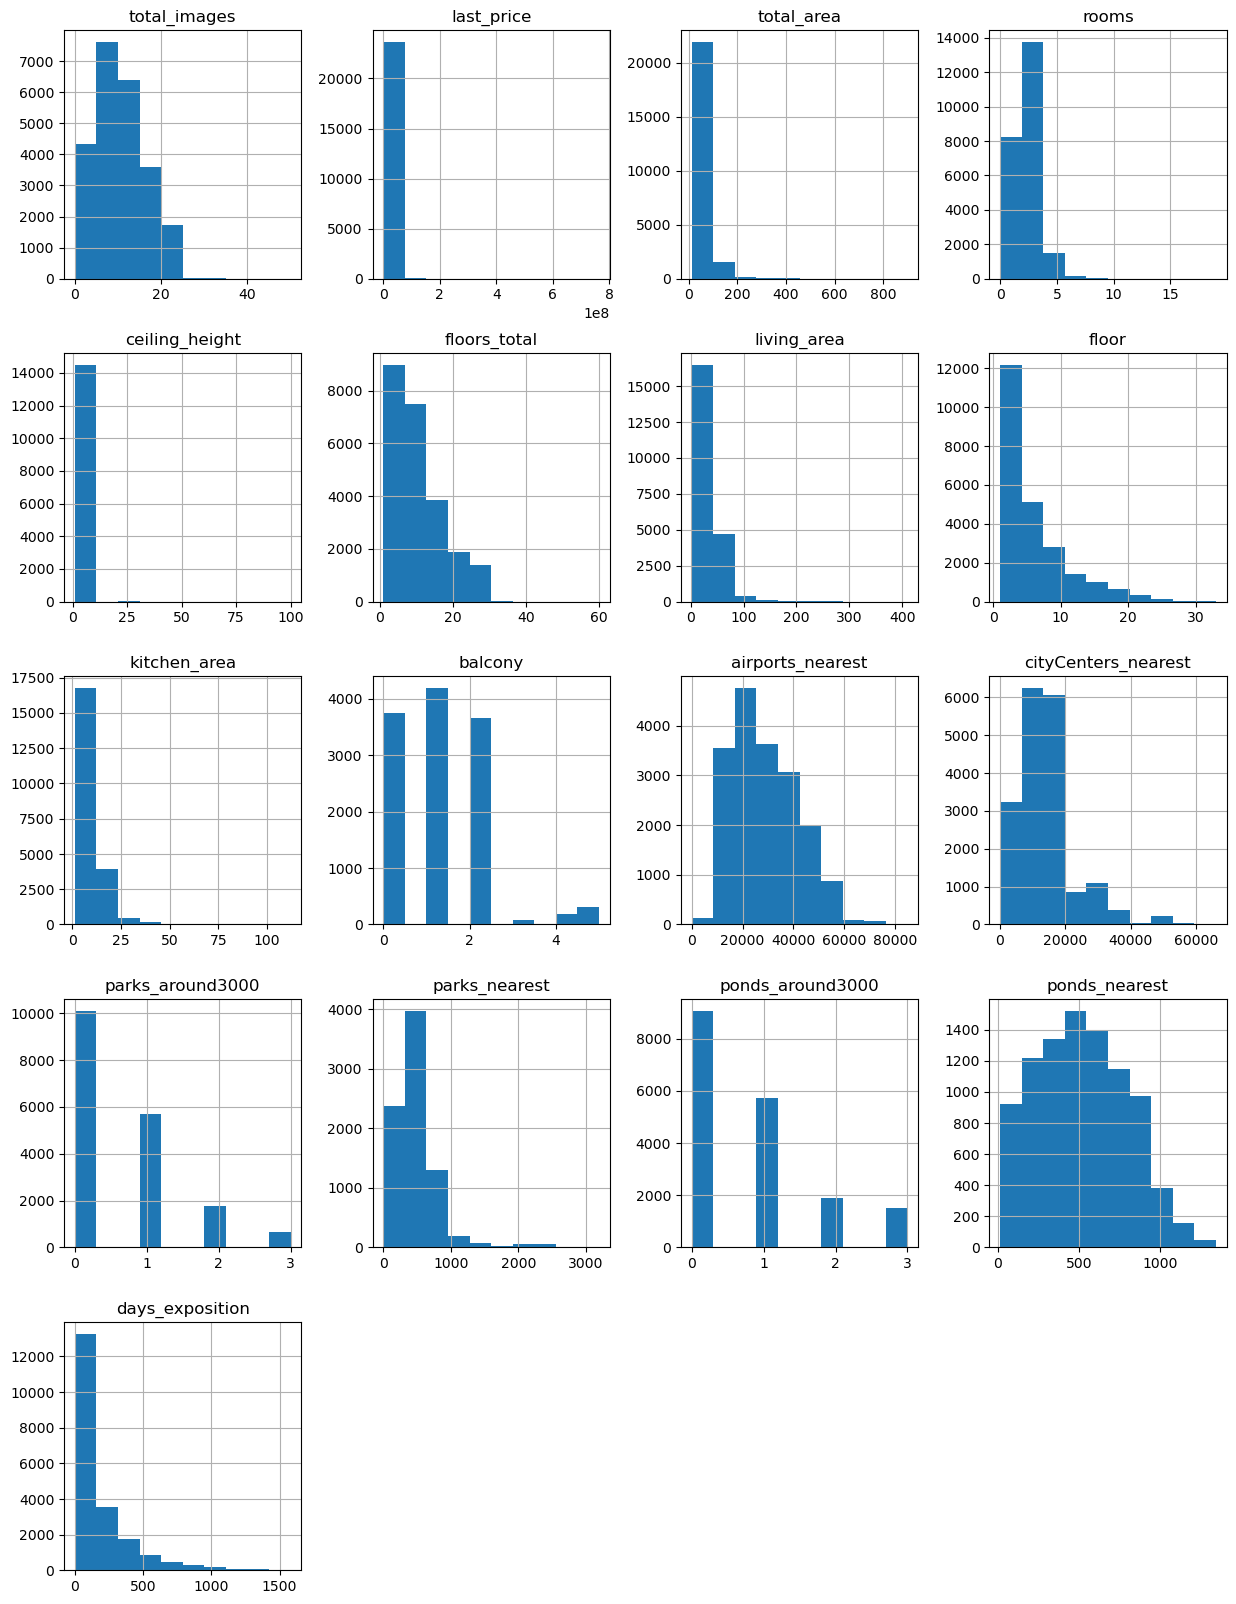

In [4]:
data.hist(figsize=(15, 20))
plt.show()

На гистограммах можно наблюдать длинные "хвосты" выбросов. Это говорит о том, что в дальнейшем необходимо будет построить более наглядные диаграммы в пределах их нормальных значений.

## 2. Предобработка данных

### 2.1 Переименование столбцов

In [5]:
# Выведем названия всех столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Переименуем некорректные названия отдельных столбцов 
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

### 2.2 Обработка пропущенных значений

In [7]:
# Выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбцы, где можно заменить пропуски значениями:
- `balcony` — число балконов, пропуски возможны из-за отсутствия балкона, поэтому можно пропуски заменить на `0`
- `floors_total` — всего этажей в доме, возможно продавец не указал количество этажей, логично замениь на значение из солбца этаж
- `is_apartment` — апартаменты (булев тип), вероятно продавец не указал этот признак потому что объект не является апартаментами, поэтому пропущеные значения можно поменять на `False`
- `locality_name` — название населённого пункта, логично поменять пропуски на текстовое значение `Unknown`, что будет означать, что населенный пункт неизвестен
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия), пропуски можно объяснить тем, что объявние еще не было опубликовано, поэтому такие пропуски можно заменить на `0`

Столбцы, где пропуски возможны из-за отсутствия информации у продавца и логичную замену предложить невозможно:
- `ceiling_height` — высота потолков (м), 
- `living_area` — жилая площадь в квадратных метрах (м²)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `parks_around_3000` — число парков в радиусе 3 км
- `ponds_around_3000` — число водоёмов в радиусе 3 км
- `city_centers_nearest` — расстояние до центра города (м)

In [8]:
# Заменяем пропуски в количестве балконов на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()  # проверяем наличие пропусков

0

In [9]:
# Заменяем пропуски в количестве этажей на значения из столбца этажа квартиры
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor']
data['floors_total'].isna().sum()  # проверяем наличие пропусков

0

In [10]:
# Заменяем пропуски в признаке аппартаментов на False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()  # проверяем наличие пропусков

0

In [11]:
# Заменяем пропуски в признаке аппартаментов на False
data['locality_name'] = data['locality_name'].fillna('Unknown')
data['locality_name'].isna().sum()  # проверяем наличие пропусков

0

In [12]:
# Заменяем пропуски в днях экспозиции на 0
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'].isna().sum()  # проверяем наличие пропусков

0

### 2.2 Изменение типов данных

In [13]:
# Выводим типы данных
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбцы с некорректным типом данных
- `floors_total` — всего этажей в доме, поэтому требуется целочисленный тип данных
- `first_day_exposition` — дату публикации приведем к типу `datetime`
- `balcony` — количество балконов может быть только целым числом 
- `parks_around_3000` — число парков в радиусе 3 км, тоже должно быть целым числом
- `ponds_around_3000` — число водоёмов в радиусе 3 км, тоже должно быть целым числом
- `days_exposition` — количество дней от публикации до снятия также должно быть целым числом

In [15]:
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].dtypes  # проверяем результат

dtype('int32')

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtypes  # проверяем результат

dtype('<M8[ns]')

In [17]:
data['balcony'] = data['balcony'].astype(int)
data['balcony'].dtypes  # проверяем результат

dtype('int32')

In [18]:
# data['parks_around_3000'] = data['parks_around_3000'].astype(int)
# data['parks_around_3000'].dtypes  # проверяем результат
# Не получилось изменить тип данных из-за наличия пропусков

In [19]:
# data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
# data['ponds_around_3000'].dtypes  # проверяем результат

In [20]:
data['days_exposition'] = data['days_exposition'].astype(int)
data['days_exposition'].dtypes  # проверяем результат

dtype('int32')

### 2.3 Обработка дубликатов

In [21]:
# Определим и исправим неявные дубли в названиях населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
data['locality_name'] = (data['locality_name'].str    
    .replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора', regex=True)
    .replace('деревня Гарболово', 'поселок Гарболово', regex=True)
    .replace('поселок Зимитицы', 'деревня Зимитицы', regex=True)
    .replace('деревня Калитино', 'поселок Калитино', regex=True)
    .replace('поселок Лесное', 'коттеджный посёлок Лесное', regex=True)
    .replace('поселок городского типа Лесогорский', 'городской посёлок Лесогорский', regex=True)
    .replace('Любань', 'поселок Любань', regex=True)
    .replace('посёлок городского типа Мга', 'городской посёлок Мга', regex=True)
    .replace('поселок городского типа Назия', 'городской посёлок Назия', regex=True)
    .replace(['поселок городского типа Никольский', 'село Никольское'], 'Никольское', regex=True)
    .replace(['посёлок городского типа Павлово', 'городской посёлок Павлово'], 'село Павлово', regex=True)
    .replace('поселок городского типа Приладожский', 'садовое товарищество Приладожский', regex=True)
    .replace('деревня Рабитицы', 'поселок Рабитицы', regex=True)
    .replace('поселок городского типа Рахья', 'садовое товарищество Рахья', regex=True)
    .replace(['поселок городского типа Рощино', 'посёлок городского типа Рощино'], 'городской посёлок Рощино', regex=True)
    .replace(['поселок Рябово', 'поселок городского типа Рябово'], 'посёлок городского типа Рябово', regex=True)
    .replace('поселок городского типа Советский', 'городской посёлок Советский', regex=True)
    .replace('городской посёлок Фёдоровское', 'деревня Фёдоровское', regex=True)
    .replace('посёлок Щеглово', 'деревня Щеглово', regex=True)
    .replace('ё', 'е', regex=True)
)
# Как вариант - можно сделать через регулярные выражения

In [23]:
# Заполним пропуски в значениях расстояния до центра города медианным значением относительно населенного пункта
#for locality_name in data['locality_name'].unique():
#    data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = \
#    data.loc[data['locality_name'] == locality_name, 'city_centers_nearest'].median()
    
#data['city_centers_nearest'].isna().sum()  # проверяем наличие пропусков    

### 2.4 Добавление новых столбцов

#### 2.4.1 Цена одного квадратного метра

In [24]:
# цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, 
# а затем округлить до двух знаков после запятой)
data['price_sq_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_sq_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_sq_meter, dtype: float64

#### 2.4.2 День недели публикации объявления

In [25]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday
data[['first_day_exposition','day_week_exposition']].head()

,first_day_exposition,day_week_exposition
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


#### 2.4.3 Месяц публикации объявления

In [26]:
data['month_exposition'] = data['first_day_exposition'].dt.month 
data[['first_day_exposition','month_exposition']].head()

,first_day_exposition,month_exposition
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


#### 2.4.4 Год публикации объявления

In [27]:
data['year_exposition'] = data['first_day_exposition'].dt.year 
data[['first_day_exposition','year_exposition']].head()

,first_day_exposition,year_exposition
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


#### 2.4.5 Тип этажа квартиры

In [28]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)
def get_floor_type(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(get_floor_type, axis=1)
data[['floor', 'floors_total', 'floor_type']].head()

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


#### 2.4.6 Расстояние до центра города в километрах

In [29]:
# расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data[['city_centers_nearest', 'city_centers_nearest_km']].head()

,city_centers_nearest,city_centers_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


## 3. Исследовательский анализ данных

### 3.1 Разброс значений отдельных параметров

In [30]:
# Функция для отрисовки гистограммы в пределах нормальных значений
def draw_histogram(values, hbins=35):
    Q1 = values.quantile(0.25)  # первый квартиль
    Q3 = values.quantile(0.75)  # третий квартиль
    min_value = values.min()    # минимальное значение
    max_value = values.max()    # максимельное значение
    IQR = Q3 - Q1               # межквартильный размах

    # левая граница нормальных значений
    left = Q1 - 1.5 * IQR
    if left > min_value:
        left = left
    else:
        left = min_value
              
    # правая граница нормальных значений
    right = Q3 + 1.5 * IQR  
    if right > max_value:
        right = max_value
    else:
        right = right    

    values.hist(bins=hbins, range=(left, right), figsize=(12, 6))
    print(f"Границы нормальных значений: {left:.2f}, {right:.2f}")

 #### 3.1.1 Общая площадь

In [31]:
# Посмотрим базовую статистику по значениям общей площади
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Границы нормальных значений: 12.00, 114.75


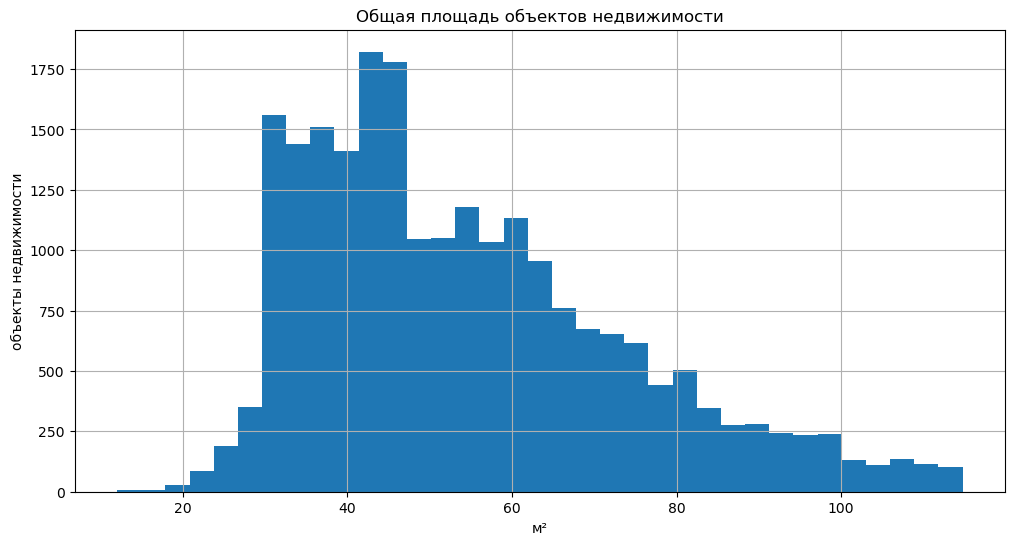

In [32]:
# Построим гистограмму общей площади в пределах ее нормальных значений
draw_histogram(data['total_area'])
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

- По гистограмме видно, что основная часть общей площади квартир находится в переделах от 30 до 70 кв. м.
- Среднее значение общей площади - 60 кв.м.
- Квартиры с площадью свыше 115 кв. м встречаются крайне редко.

#### 3.1.2 Жилая площадь

In [33]:
# Посмотрим базовую статистику по значениям жилой площади
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Границы нормальных значений: 2.00, 77.85


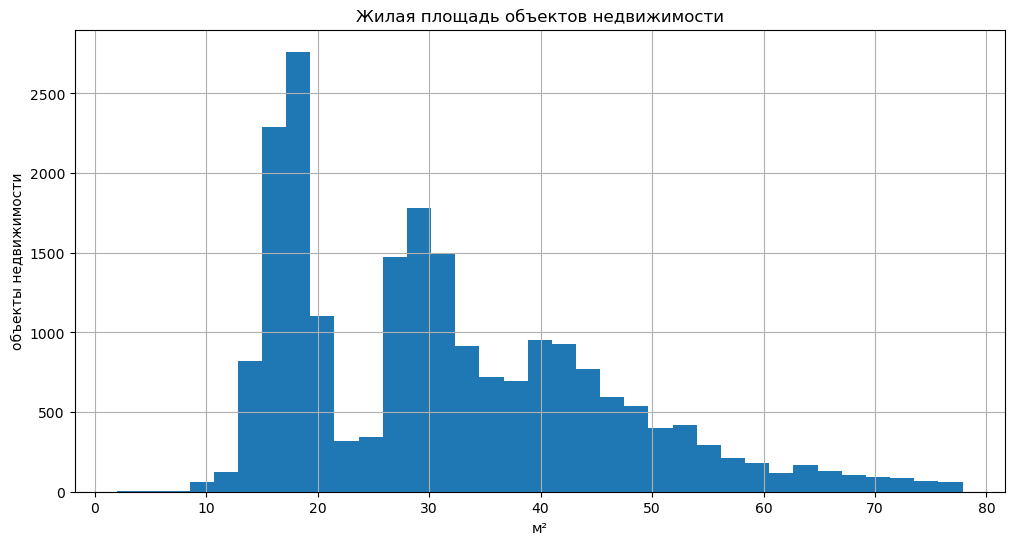

In [34]:
# Построим гистограмму жилой площади в пределах нормальных значений
draw_histogram(data['living_area'])
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов имеет значение жилой площади от 15 до 35 кв. м. Меньше квартир с жилой площадью в пределах от 35 до 60 кв. м. Квартиры с жилой площадью свыше 60 кв. м встречаются редко.

#### 3.1.3 Площадь кухни

In [35]:
# Посмотрим базовую статистику по значениям площади кухни
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Границы нормальных значений: 1.30, 19.50


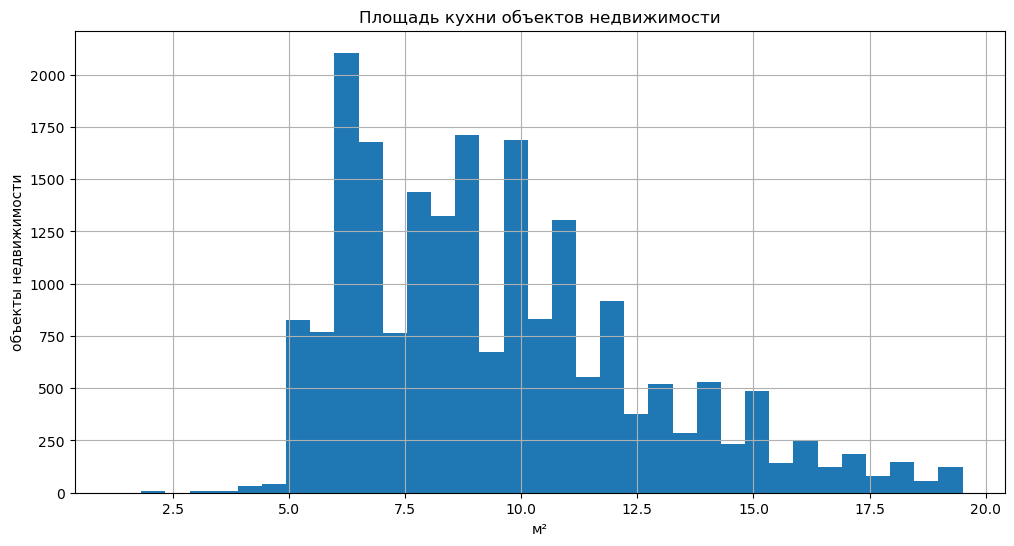

In [36]:
# Построим гистограмму площади кухни в пределах нормальных значений
draw_histogram(data['kitchen_area'])
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Основные значения площади кухни расположены от 5 до 12,5 кв. м. Площадь кухни более 13 м² встречается редко. 
Среднее значение площади кухни - 10,5 кв. м.

#### 3.1.4 Цена объекта

In [37]:
# Посмотрим базовую статистику по значениям цены объекта
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Границы нормальных значений: 12190.00, 11900000.00


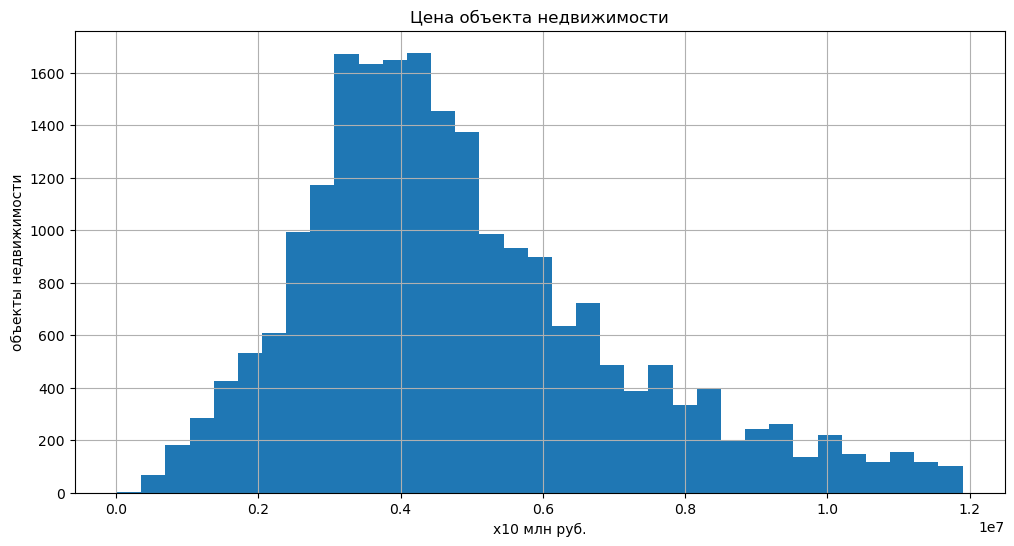

In [38]:
# Построим гистограмму цены объекта в пределах нормальных значений
draw_histogram(data['last_price'])
plt.title('Цена объекта недвижимости')
plt.xlabel('x10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов имеют стоимость в пределах от 3 до 6 млн руб. Квартир стоимостью более 10 млн руб. немного.

#### 3.1.5 Количество комнат

In [39]:
# Посмотрим базовую статистику по значениям столбца количество комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Границы нормальных значений: 0.00, 6.00


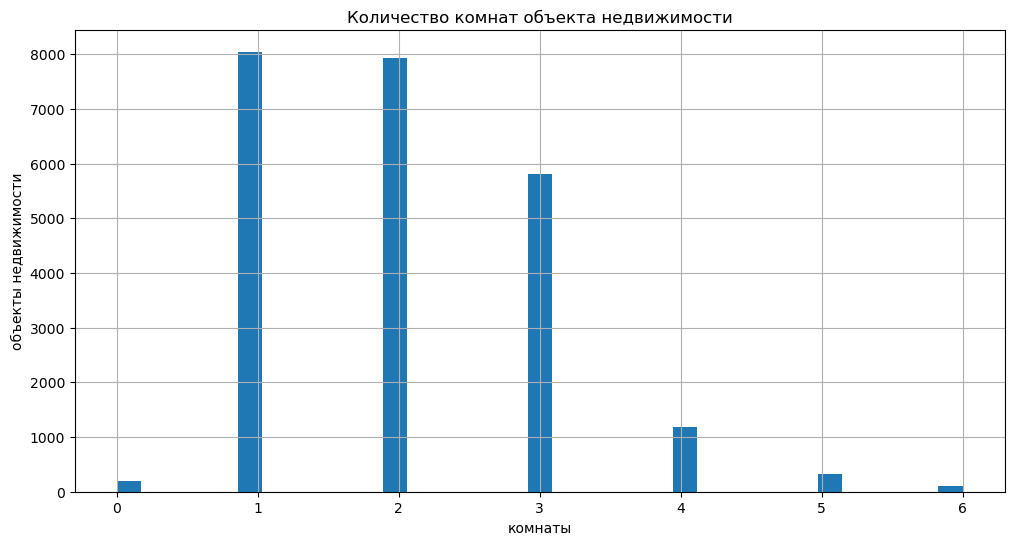

In [40]:
# Построим гистограмму количества комнат в пределах нормальных значений
draw_histogram(data['rooms'])
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство квартир имеют 1 или 2 комнаты. Крайне редко встречаются объекты с 5 и свыше количеством комнат. 

#### 3.1.6 Высота потолков

In [41]:
# Посмотрим базовую статистику по значениям высоты потолков
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Границы нормальных значений: 2.10, 3.22


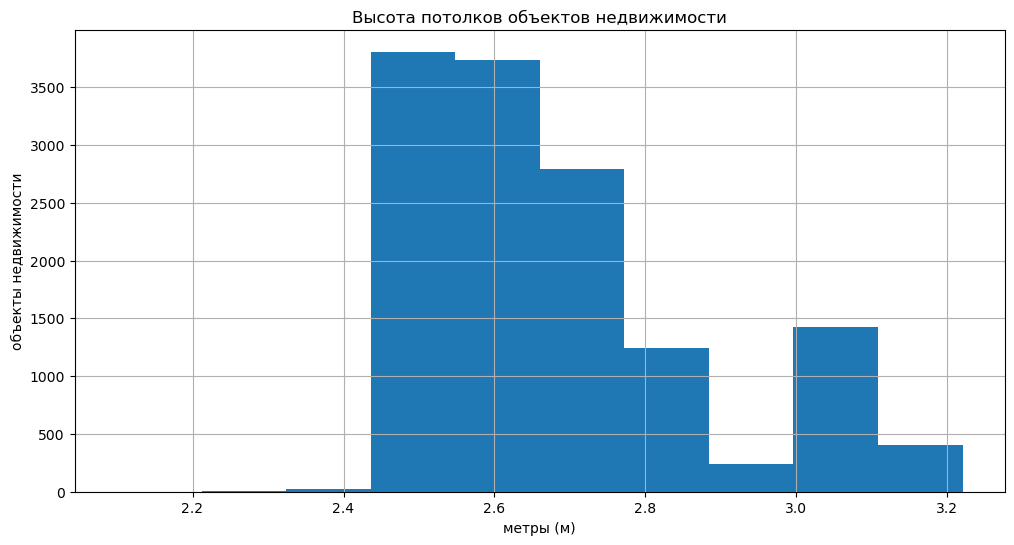

In [42]:
# Построим гистограмму высоты потолков в пределах нормальных значений
draw_histogram(data['ceiling_height'], 10)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство квартир имеют высоту потолков от 2,5 до 2,9 м.Реже встречаются объекты с высотой потолков выше 2,9 м.

#### 3.1.7 Тип этажа квартиры

In [43]:
# Посмотрим базовую статистику по значениям типа этажа квартиры
data['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17363
Name: floor_type, dtype: object

In [44]:
data['floor_type'].value_counts()

floor_type
другой       17363
последний     3447
первый        2889
Name: count, dtype: int64

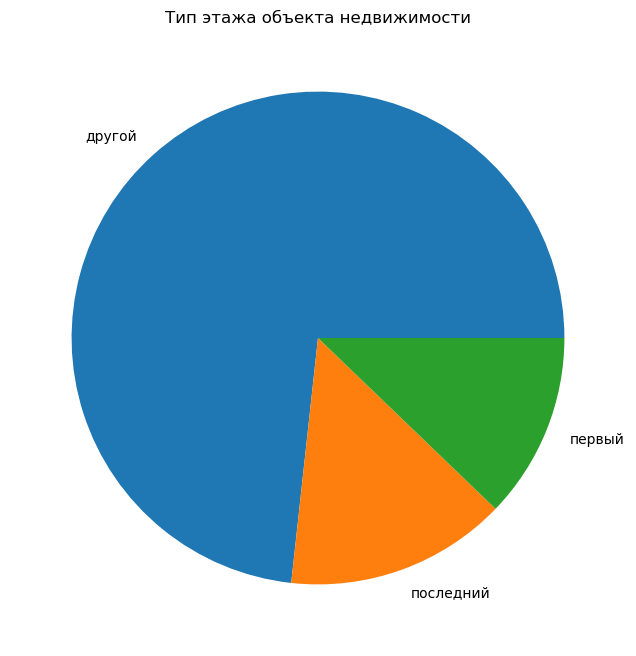

In [45]:
data['floor_type'].value_counts().plot.pie(figsize=(8, 8))
plt.title('Тип этажа объекта недвижимости')
plt.ylabel('')
plt.show()

Большинство квартир находится на этажах между первым и последним этажом. Квартир на первом и последнем этаже представлено примерно одинаково.

#### 3.1.8 Общее количество этажей в доме

In [46]:
# Посмотрим базовую статистику по значениям общего количества этажей в доме
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Границы нормальных значений: 1.00, 32.50


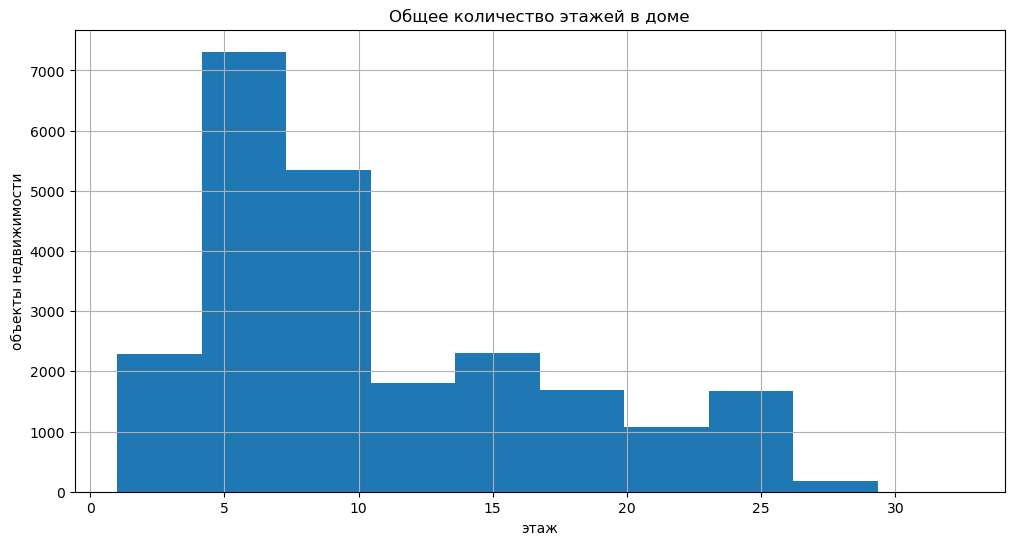

In [47]:
# Построим гистограмму общего количества этажей в доме в пределах нормальных значений
draw_histogram(data['floors_total'], 10)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Чаще встречаются объявления с квартирами, расположенными с 5 по 10 этаж.

#### 3.1.9 Расстояние до центра города

In [48]:
# Посмотрим базовую статистику по значениям расстояния до центра города в метрах
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Границы нормальных значений: 181.00, 26875.50


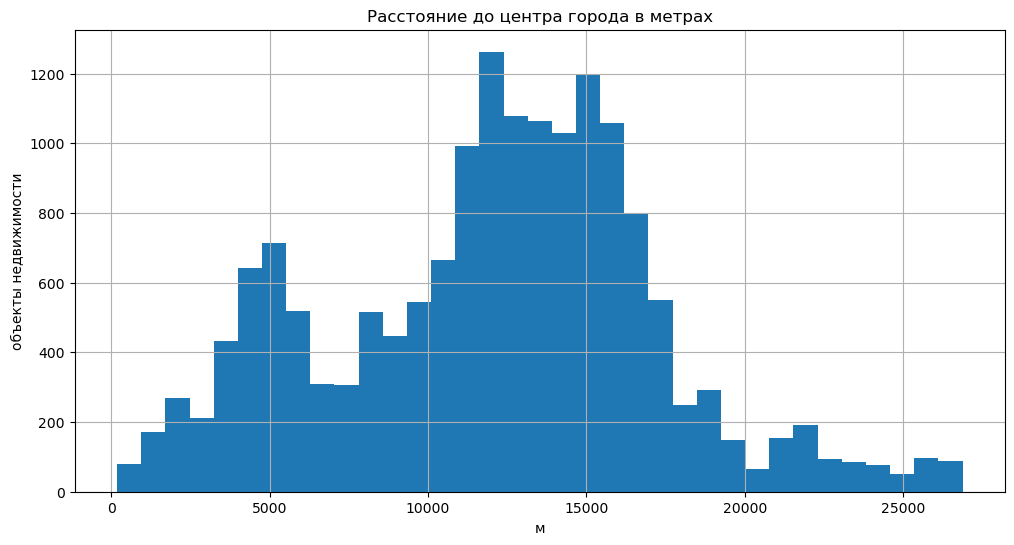

In [49]:
# Построим гистограмму расстояния до центра города в метрах в пределах нормальных значений
draw_histogram(data['city_centers_nearest'])
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов находятся на удалении 11-18 км от центра

#### 3.1.10 Расстояние до ближайшего парка

In [50]:
# Посмотрим базовую статистику по значениям расстояния до ближайшего парка
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Границы нормальных значений: 1.00, 1098.00


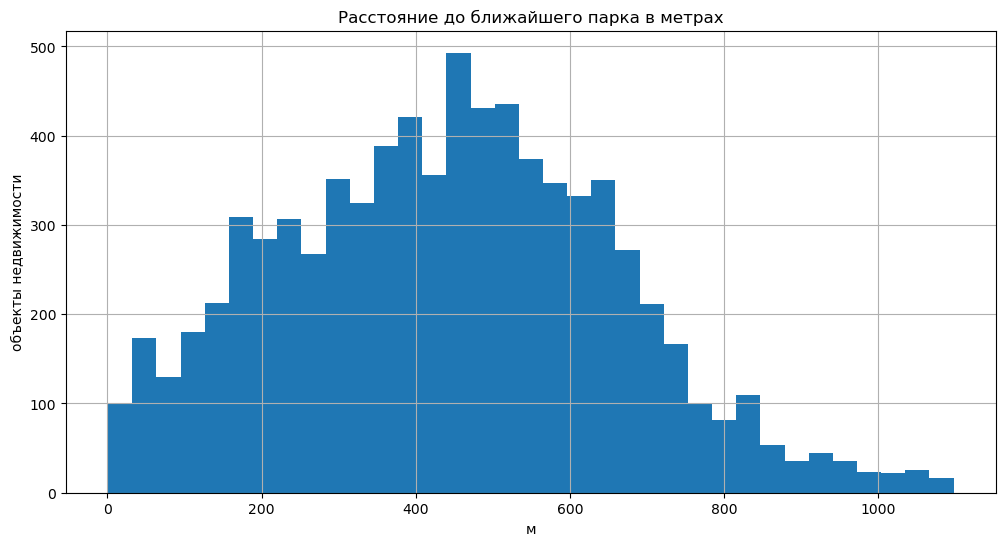

In [51]:
# Построим гистограмму расстояния до ближайшего парка в пределах нормальных значений
draw_histogram(data['parks_nearest'])
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. 

### 3.2 Как быстро продавались квартиры

In [52]:
# Посмотрим базовую статистику по значениям сколько дней было размещено объявление (от публикации до снятия)
# Будем анализировать значения больше ноля, то есть те, которые были опубликованы
days_exposition = data.loc[data['days_exposition'] > 0, 'days_exposition']
days_exposition.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Границы нормальных значений: 1.00, 512.50


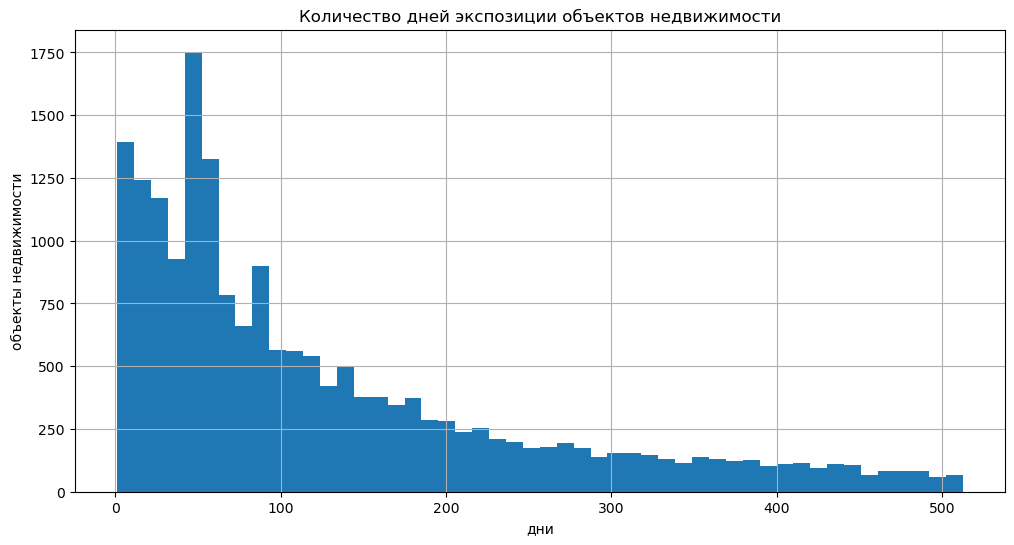

In [53]:
# Построим гистограмму 
draw_histogram(days_exposition, 50)
plt.title('Количество дней экспозиции объектов недвижимости')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

1. По гистограмме видно, что у разброс значений с большим "хвостом". 
2. Медианное значение - 95 дней, поэтому можно сделать вывод, что чаще всего продаются за 95 дней.
3. Быстрыми продажами можно считать квартиры, которые продаются за 45 дней (первый квартиль).
4. Необычно долгими можно считать значения свыше 512 дней (выходят за границы нормальных).

### 3.3 Факторы больше всего влияющие влияют на цену

Изучим, зависит ли цена от:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

In [54]:
# Очистим датафрейм от объявлений, которые не публиковались
data_cleaned_with_exposition = data.query('days_exposition > 0')
filter_res = 100 - (data_cleaned_with_exposition.shape[0] / data.shape[0]) * 100
print(f'Процент данных, который мы отбросили при фильтрации: {filter_res:.1f}%')

Процент данных, который мы отбросили при фильтрации: 13.4%


In [55]:
# Очистим датафрейм от выбросов по дням экспозиции
data_cleaned = data_cleaned_with_exposition.query('days_exposition <= 512.50')
filter_res = 100 - (data_cleaned.shape[0] / data_cleaned_with_exposition.shape[0]) * 100
print(f'Процент данных, который мы отбросили при фильтрации: {filter_res:.1f}%')

Процент данных, который мы отбросили при фильтрации: 8.1%


#### 3.3.1 Зависимость цены от общей площади

In [56]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями стоимости в группах общей площади
data_pivot = data_cleaned.pivot_table(index= 'total_area', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['total_area', 'median_price']
print(data_pivot)

      total_area  median_price
0           12.0     2400000.0
1           13.0     1850000.0
2           13.2     1686000.0
3           14.0     1190000.0
4           15.0     1725000.0
...          ...           ...
1883       495.0    91500000.0
1884       500.0   190000000.0
1885       590.0    65000000.0
1886       618.0   300000000.0
1887       900.0   420000000.0

[1888 rows x 2 columns]


<Axes: xlabel='total_area', ylabel='median_price'>

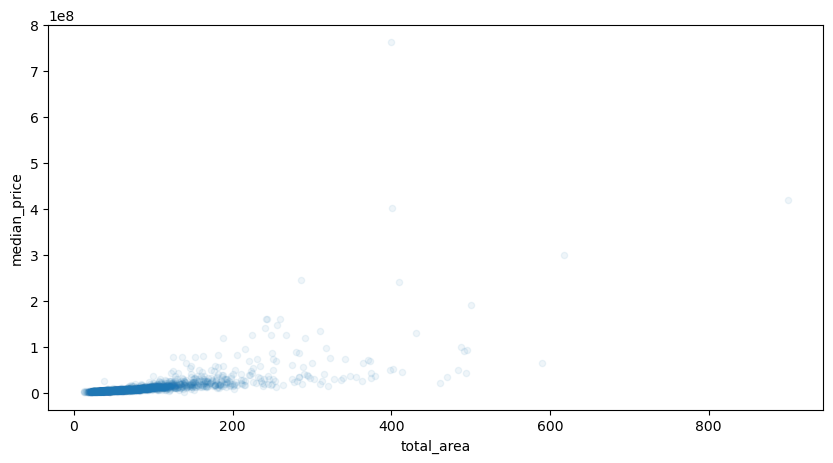

In [57]:
# Построим диаграмму рассеяния
data_pivot.sort_values('total_area').plot(x='total_area', y='median_price', kind='scatter', alpha=0.07, figsize=(10, 5))

In [58]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['total_area'].corr(data_cleaned['last_price'])

0.6296120862845934

- На диаграмме рассеяния четко видна линейная зависимость - с увеличением общей площади лота растет и цена. Наиболее отчетливо эта зависимость видна в диапазоне до 200 кв.м.
- Коэффициент корреляции со значением 0,63 также подтверждает достаточно сильную зависимость стоимости от общей площади.

#### 3.3.2 Зависимость цены от жилой площади

In [59]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах жилой площади
data_pivot = data_cleaned.pivot_table(index= 'living_area', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['living_area', 'median_price']
print(data_pivot)

      living_area  median_price
0             2.0     4340000.0
1             3.0    34715000.0
2             5.0     2680000.0
3             5.4     6100000.0
4             6.0     3799000.0
...           ...           ...
1502        300.0    51000000.0
1503        312.5    49950000.0
1504        347.5    91500000.0
1505        409.0    65000000.0
1506        409.7   420000000.0

[1507 rows x 2 columns]


<Axes: xlabel='living_area', ylabel='median_price'>

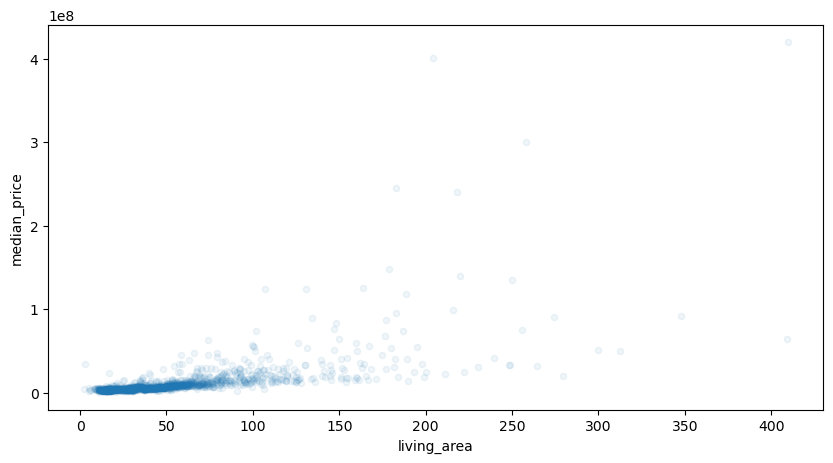

In [60]:
# Построим диаграмму рассеяния жилой площади
data_pivot.sort_values('living_area').plot(x='living_area', y='median_price', kind='scatter', alpha=0.07, figsize=(10, 5))

In [61]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['living_area'].corr(data_cleaned['last_price'])

0.5429387943453797

- На диаграмме рассеяния четко видна линейная зависимость - с увеличением жилой площади объекта растет и цена. Наиболее отчетливо эта зависимость видна в диапазоне до 50 кв.м.
- Коэффициент корреляции со значением 0,54 также подтверждает достаточно сильную зависимость стоимости от жилой площади.

#### 3.3.3 Зависимость цены от площади кухни

In [62]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах площади кухни
data_pivot = data_cleaned.pivot_table(index= 'kitchen_area', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['kitchen_area', 'median_price']
print(data_pivot)

     kitchen_area  median_price
0            2.00     2720000.0
1            2.30     2940000.0
2            2.40     2200000.0
3            2.89     5967734.0
4            3.00     3180000.0
..            ...           ...
827         93.20    82400000.0
828        100.00    65000000.0
829        100.70    12500000.0
830        107.00    85000000.0
831        112.00   420000000.0

[832 rows x 2 columns]


<Axes: xlabel='kitchen_area', ylabel='median_price'>

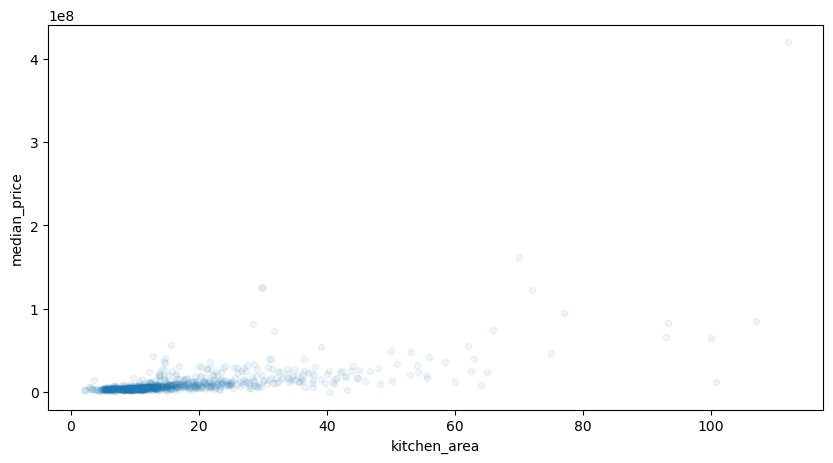

In [63]:
# Построим диаграмму рассеяния площади кухни
data_pivot.sort_values('kitchen_area').plot(x='kitchen_area', y='median_price', kind='scatter', alpha=0.07, figsize=(10, 5))

In [64]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['kitchen_area'].corr(data_cleaned['last_price'])

0.4960265661540131

- На диаграмме рассеяния четко видна зависимость - с увеличением площади кухни растет и цена. 
- Коэффициент корреляции со значением 0,49 также подтверждает наличие зависимости стоимости от площади кухни.

#### 3.3.4 Зависимость цены от количества комнат

In [65]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены 
data_pivot = data_cleaned.pivot_table(index= 'rooms', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['rooms', 'median_price']
print(data_pivot)

    rooms  median_price
0       0     2700000.0
1       1     3550000.0
2       2     4670000.0
3       3     6000000.0
4       4     8500000.0
5       5    13040000.0
6       6    19500000.0
7       7    24000000.0
8       8    35300000.0
9       9    19500000.0
10     10    27750000.0
11     12   420000000.0
12     14    26829500.0
13     15    65000000.0
14     19    32250000.0


<Axes: xlabel='rooms', ylabel='median_price'>

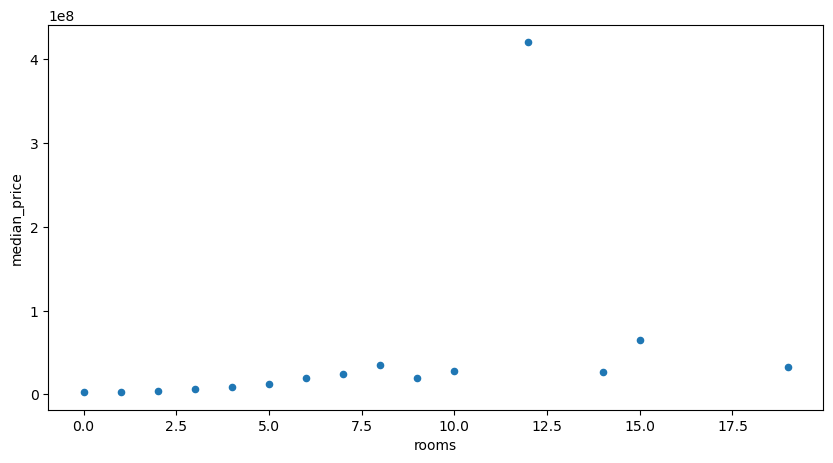

In [66]:
# Построим диаграмму рассеяния
data_pivot.sort_values('rooms').plot(x='rooms', y='median_price', kind='scatter', figsize=(10, 5))

In [67]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['rooms'].corr(data_cleaned['last_price'])

0.341988726051085

- На диаграмме рассеяния прослеживается зависимость - с увеличением количества комнат до 10, увеличивается и цена. 
- Коэффициент корреляции со значением 0,34 также подтверждает наличие зависимости стоимости от количества комнат.

#### 3.3.5 Зависимость цены от этажа - первый, последний, другой

In [68]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах жилой площади
data_pivot = data_cleaned.pivot_table(index= 'floor_type', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['floor_type', 'median_price']
print(data_pivot)

  floor_type  median_price
0     другой     4650000.0
1     первый     3800000.0
2  последний     4200000.0


<Axes: xlabel='floor_type', ylabel='median_price'>

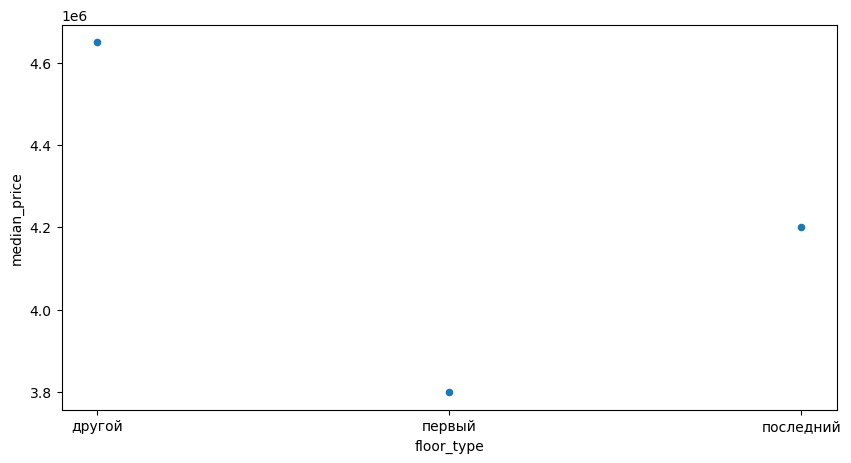

In [69]:
# Построим диаграмму рассеяния
data_pivot.sort_values('floor_type').plot(x='floor_type', y='median_price', kind='scatter', figsize=(10, 5))

По диаграмме видно, что стоимость квартир выше, если это не первый и не последний этаж. Самая низкая стоимость у квартир на первом этаже. Это говорит о наличие зависимости цены от этажа, на котором расположена квартира (первый, последний, другой).

#### 3.3 6 Зависимость цены от дня недели размещения

In [70]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах жилой площади
data_pivot = data_cleaned.pivot_table(index= 'day_week_exposition', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['day_week_exposition', 'median_price']
print(data_pivot)

   day_week_exposition  median_price
0                    0     4500000.0
1                    1     4500000.0
2                    2     4500000.0
3                    3     4500000.0
4                    4     4450000.0
5                    5     4500000.0
6                    6     4440000.0


<Axes: xlabel='day_week_exposition', ylabel='median_price'>

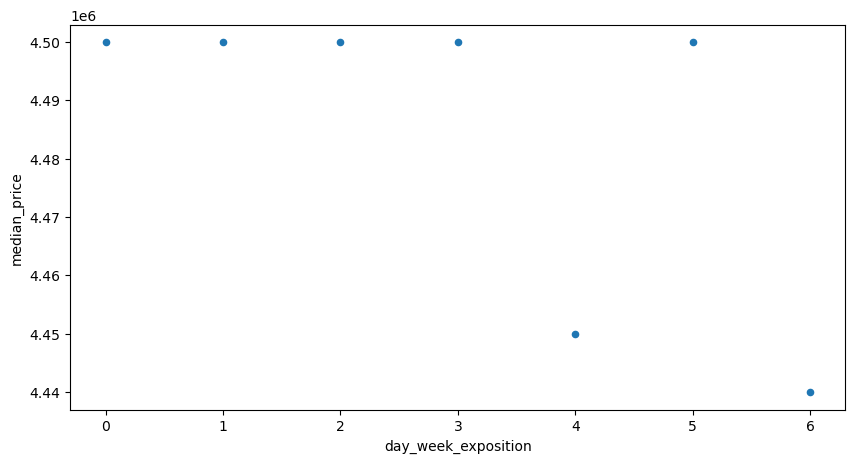

In [71]:
# Построим диаграмму рассеяния
data_pivot.sort_values('day_week_exposition').plot(x='day_week_exposition', y='median_price', kind='scatter', figsize=(10, 5))

In [72]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['day_week_exposition'].corr(data_cleaned['last_price'])

0.004433371315168913

Зависимость цены от дня недели размещения по диаграмме не наблюдается. Коэффициент корреляции подтверждает отсутствие зависимости. 

#### 3.3.7 Зависимость цены от месяца размещения

In [73]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах жилой площади
data_pivot = data_cleaned.pivot_table(index= 'month_exposition', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['month_exposition', 'median_price']
print(data_pivot)

    month_exposition  median_price
0                  1     4500000.0
1                  2     4500000.0
2                  3     4436742.0
3                  4     4500000.0
4                  5     4499000.0
5                  6     4300000.0
6                  7     4500000.0
7                  8     4500000.0
8                  9     4590000.0
9                 10     4450000.0
10                11     4594500.0
11                12     4490000.0


<Axes: xlabel='month_exposition', ylabel='median_price'>

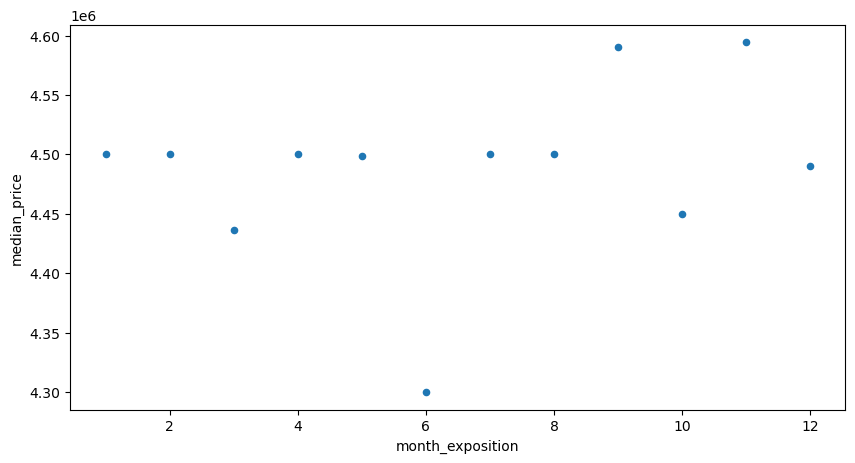

In [74]:
# Построим диаграмму рассеяния
data_pivot.sort_values('month_exposition').plot(x='month_exposition', y='median_price', kind='scatter', figsize=(10, 5))

In [75]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['month_exposition'].corr(data_cleaned['last_price'])

0.003840749546710692

Зависимость цены от месяца размещения по диаграмме не наблюдается. Коэффициент корреляции подтверждает отсутствие зависимости. 

#### 3.3.8 Зависимость цены от года размещения

In [76]:
# Подготовим данные для визуализации - рассчитаем сводную таблицу с медианными значениями цены в группах жилой площади
data_pivot = data_cleaned.pivot_table(index= 'year_exposition', values='last_price', aggfunc='median').reset_index()
data_pivot.columns = ['year_exposition', 'median_price']
print(data_pivot)

   year_exposition  median_price
0             2015     4897946.0
1             2016     4495000.0
2             2017     4450000.0
3             2018     4490000.0
4             2019     4789500.0


<Axes: xlabel='year_exposition', ylabel='median_price'>

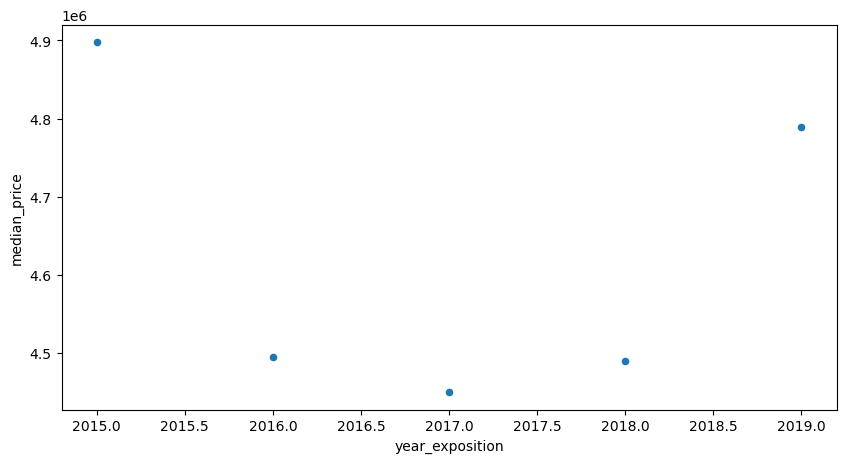

In [77]:
# Построим диаграмму рассеяния
data_pivot.sort_values('year_exposition').plot(x='year_exposition', y='median_price', kind='scatter', figsize=(10, 5))

In [78]:
# Посчитаем коэффициент корреляции Пирсона
data_cleaned['year_exposition'].corr(data_cleaned['last_price'])

-0.037927267314800596

Зависимость цены от года размещения по диаграмме не наблюдается. Коэффициент корреляции подтверждает отсутствие зависимости.

### 3.4 Средняя цену квадратного метра в 10 населённых пунктах

In [79]:
# Определим список из 10 населенных пунктов с наибольшим количеством объявлений
top_10_localities = data_cleaned['locality_name'].value_counts().head(10)
top_10_localities

locality_name
Санкт-Петербург      12479
поселок Мурино         519
поселок Шушары         388
Всеволожск             308
Колпино                294
поселок Парголово      288
Пушкин                 278
деревня Кудрово        268
Гатчина                244
Выборг                 193
Name: count, dtype: int64

In [80]:
# Отфильтруем данные по 10 населенным пунктам с наибольшим количеством объявлений
data_with_10_localities = data_cleaned.loc[
    data_cleaned['locality_name'].isin(top_10_localities.index), ['locality_name', 'price_sq_meter']]
data_with_10_localities.head()

,locality_name,price_sq_meter
1,поселок Шушары,82920.79
3,Санкт-Петербург,408176.10
4,Санкт-Петербург,100000.00
6,поселок Парголово,99195.71
8,поселок Мурино,87454.76


In [81]:
# Рассчитаем среднюю цену за кв метр в 10 населенных пунктах
top_sq_meter_mean = data_with_10_localities.pivot_table(
    index= 'locality_name', values='price_sq_meter', aggfunc=['mean', 'count']).reset_index()
top_sq_meter_mean.columns = ['locality_name', 'price_sq_meter', 'count']
top_sq_meter_mean.sort_values(by=['price_sq_meter'], ascending=False)

,locality_name,price_sq_meter,count
5,Санкт-Петербург,111738.332453,12479
4,Пушкин,101894.611475,278
6,деревня Кудрово,92670.928731,268
8,поселок Парголово,89162.887813,288
7,поселок Мурино,85974.347765,519
9,поселок Шушары,77914.528144,388
3,Колпино,74748.675374,294
0,Всеволожск,68605.620519,308
2,Гатчина,68065.179549,244
1,Выборг,57011.264352,193


- Санкт-Петербург - населённый пункт с самой высокой стоимостью квадратного метра.
- Выборг - населённый пункт с самой низкой стоимостью квадратного метра.

### 3.5 Средняя стоимость квадратного метра объекта на разном удалении от центра в Санкт-Петербурге 

In [82]:
# Отфильтруем объявления по Санкт-Петербургу
data_spb = data_cleaned.loc[
    data_cleaned['locality_name'] == 'Санкт-Петербург', ['city_centers_nearest_km', 'price_sq_meter']]
data_spb.head()

,city_centers_nearest_km,price_sq_meter
3,7.0,408176.10
4,8.0,100000.00
9,15.0,88524.59
10,14.0,127525.25
15,14.0,119230.77


In [83]:
# Рассчитаем среднюю стоимость на разном удалении от центра Санкт-Петербурга
distance_spb = data_spb.pivot_table(
    index= 'city_centers_nearest_km', values='price_sq_meter', aggfunc=['mean']).reset_index()
distance_spb.columns = ['distance', 'price_sq_meter']
distance_spb.sort_values(by=['price_sq_meter'], ascending=False)

,distance,price_sq_meter
0,0.0,199277.968125
1,1.0,166147.968168
2,2.0,158735.148520
6,6.0,147397.243742
7,7.0,145275.648082
5,5.0,137710.381021
4,4.0,132772.998008
27,27.0,132115.710000
8,8.0,123295.408764
3,3.0,115769.034689


<Axes: xlabel='distance'>

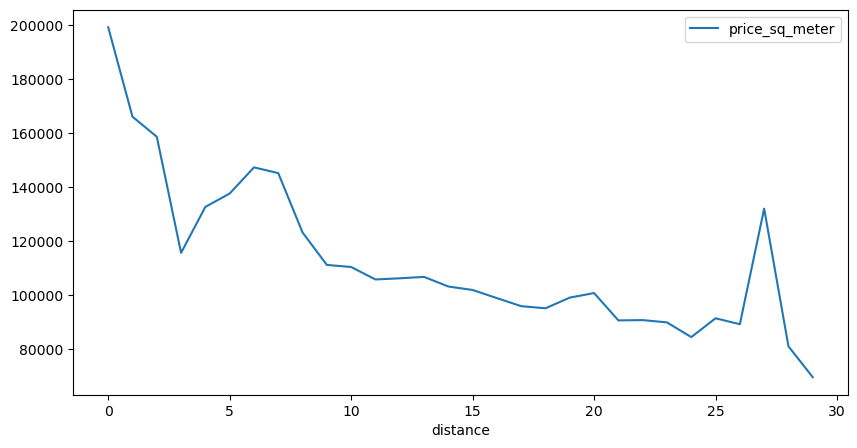

In [84]:
distance_spb.plot(x='distance', y='price_sq_meter', kind='line', figsize=(10, 5))

По графику видно, что есть зависимость цены за квадратный метр от удаления от центра города. Чем ближе к центру, тем выше цена.

## Общий вывод

В результате исследования датасета с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет были изучены основные статистические показатели, заполнены пропуски, удалены дубликаты. 

По результатам исследования были сделаны следующие выводы:

1. **Чаще встречаются объявления со следующими параметрами:**
    - общая площадь квартир в переделах от 30 до 70 кв. м. Среднее значение общей площади - 60 кв. м.
    - жилая площадь от 15 до 35 кв. м. Среднее значение жилой площади - 34 кв. м.
    - площадь кухни в пределах от 5 до 12,5 кв. м. Среднее значение площади кухни - 10,5 кв. м.
    - стоимость в пределах от 3 до 6 млн. руб.
    - количество комнат - 1 или 2 комнаты. Среднее значение - 2 комнаты
    - высота потолков от 2,5 до 2,9 м. Среднее значение высоты потолков - 2,77 м.
    - тип этажа квартиры - этажи между первым и последним
    - общее количество этажей в доме - 5-10 этажей
    - расстояние до центра города - объекты находятся на удалении 11-18 км от центра 
    - расстояние до ближайшего парка - объекты недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600 м.


2. **По гистограмме сроков продажи квартир было установлено следующее:**
    - чаще всего квартиры продаются за 95 дней
    - быстрыми продажами можно считать квартиры, которые продаются за 45 дней
    - необычно долгими можно считать значения свыше 512 дней


3. **На цену квартиры больше всего оказывают влияние следующие факторы:**
    - Общая площадь квартиры
        - с увеличением общей площади лота растет и цена - наиболее отчетливо эта зависимость видна в диапазоне до 200 кв.м. 
        - коэффициент корреляции со значением 0,63 также подтверждает достаточно сильную зависимость стоимости от общей площади

    - Жилая площадь
        - с увеличением жилой площади объекта растет и цена - наиболее отчетливо эта зависимость видна в диапазоне до 50 кв.м.
        - коэффициент корреляции со значением 0,54 также подтверждает достаточно сильную зависимость стоимости от жилой площади

    - Площадь кухни
        - с увеличением площади кухни растет и цена.
        - коэффициент корреляции со значением 0,49 также подтверждает наличие зависимости стоимости от площади кухни

    - Количество комнат
        - с увеличением количества комнат до 10 увеличивается и цена 
        - коэффициент корреляции со значением 0,34 также подтверждает наличие зависимости стоимости от количества комнат

    - Этаж - первый, последний или другой
        - стоимость квартир выше, если это не первый и не последний этаж
        - самая низкая стоимость у квартир на первом этаже


4. **Согласно исследованию цен за квадратный метр в 10 населенных пунктах с наимбольшим количеством объявлений были сделаны следующие выводы:**
    - Санкт-Петербург - это населённый пункт с самой высокой стоимостью квадратного метра
    - Выборг - населённый пункт с самой низкой стоимостью квадратного метра


5. **Также была установлена зависимость цены за квадратный метр от удаления от центра города Санкт-Петербург:** 
    - чем ближе к центру - тем выше цена
